In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
from matplotlib.colors import LogNorm

import cloud_filtering.training.config as config
import cloud_filtering.plotting.utils as plot_utils

plt.style.use('../plotstyling.mplstyle')

In [3]:
filename = "../../../DataStorage/AWS/for_cloud_filtering/dummy_cloud_signal_test_set_retrievals_AWS33_20150101.nc"
ds = xr.open_dataset(filename)

In [4]:
ds

<xarray.Dataset> Size: 8MB
Dimensions:                       (number: 50000, quantile: 5,
                                   masked_channel: 6, surface_channel: 6)
Coordinates:
  * number                        (number) int64 400kB 0 1 2 ... 49998 49999
  * quantile                      (quantile) float32 20B 0.05 0.25 0.5 0.75 0.95
  * masked_channel                (masked_channel) <U5 120B 'AWS31' ... 'AWS36'
  * surface_channel               (surface_channel) <U5 120B 'AWS31' ... 'AWS36'
Data variables: (12/23)
    Latitude                      (number) float32 200kB ...
    Longitude                     (number) float32 200kB ...
    CloudSat_Datetime             (number) datetime64[ns] 400kB ...
    Fwp                           (number) float32 200kB ...
    Ta_Allsky_AWS31               (number) float32 200kB ...
    Ta_Allsky_AWS32               (number) float32 200kB ...
    ...                            ...
    cloud_signal_AWS34_quantiles  (number, quantile) float32 1MB ...
    cloud_signal_AWS34_mean       (number) float32 200kB ...
    cloud_signal_AWS35_true       (number) float32 200kB ...
    cloud_signal_AWS35_quantiles  (number, quantile) float32 1MB ...
    cloud_signal_AWS35_mean       (number) float32 200kB ...
    surface_mask                  (number, surface_channel) bool 300kB ...
Attributes:
    model_type:  AWS33

In [91]:
# TODO: replace with quantiles from config
quantiles = np.array([0.05, 0.25, 0.5, 0.75, 0.95])

Ta_bins = np.linspace(100, 300, 50)
deviation_bins = np.linspace(-80, 50, 101)  # bins used for calculating distributions of predicted error
cloud_signal_bins = np.linspace(-15, 160, 176)

deviation_bins_centre = deviation_bins[:-1] + np.diff(deviation_bins) / 2
cloud_signal_bins_centre = cloud_signal_bins[:-1] + np.diff(cloud_signal_bins) / 2

blues = plt.cm.Blues(np.linspace(0.3, 0.9, 6))
oranges = plt.cm.Oranges(np.linspace(0.9, 0.3, 4))

# Model performance

In [6]:
# TODO: check CDFS look reasonable

[]
['Ta_Allsky_AWS31']
['Ta_Allsky_AWS31', 'Ta_Allsky_AWS32']
['Ta_Allsky_AWS31', 'Ta_Allsky_AWS32', 'Ta_Allsky_AWS33', 'Ta_Allsky_AWS44']
['Ta_Allsky_AWS31', 'Ta_Allsky_AWS32', 'Ta_Allsky_AWS33', 'Ta_Allsky_AWS44', 'Ta_Allsky_AWS34', 'Ta_Allsky_AWS43']
[]
['Ta_Allsky_AWS31']
['Ta_Allsky_AWS31', 'Ta_Allsky_AWS32']
['Ta_Allsky_AWS31', 'Ta_Allsky_AWS32', 'Ta_Allsky_AWS33', 'Ta_Allsky_AWS44']
['Ta_Allsky_AWS31', 'Ta_Allsky_AWS32', 'Ta_Allsky_AWS33', 'Ta_Allsky_AWS44', 'Ta_Allsky_AWS34', 'Ta_Allsky_AWS43']
[]
['Ta_Allsky_AWS31']
['Ta_Allsky_AWS31', 'Ta_Allsky_AWS32']
['Ta_Allsky_AWS31', 'Ta_Allsky_AWS32', 'Ta_Allsky_AWS33', 'Ta_Allsky_AWS44']
['Ta_Allsky_AWS31', 'Ta_Allsky_AWS32', 'Ta_Allsky_AWS33', 'Ta_Allsky_AWS44', 'Ta_Allsky_AWS34', 'Ta_Allsky_AWS43']
[]
['Ta_Allsky_AWS31']
['Ta_Allsky_AWS31', 'Ta_Allsky_AWS32']
['Ta_Allsky_AWS31', 'Ta_Allsky_AWS32', 'Ta_Allsky_AWS33', 'Ta_Allsky_AWS44']
['Ta_Allsky_AWS31', 'Ta_Allsky_AWS32', 'Ta_Allsky_AWS33', 'Ta_Allsky_AWS44', 'Ta_Allsky_AWS34', 'Ta

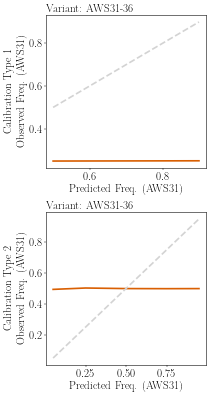

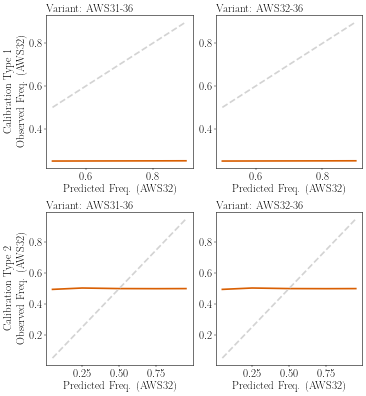

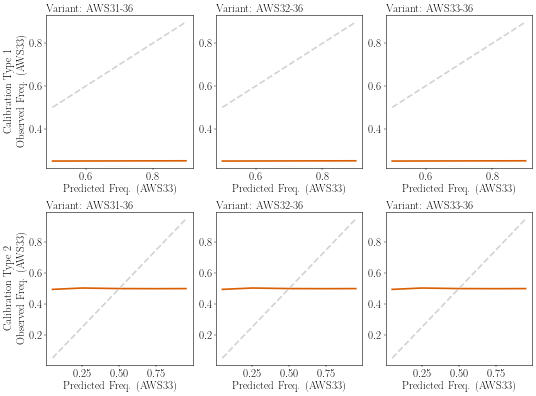

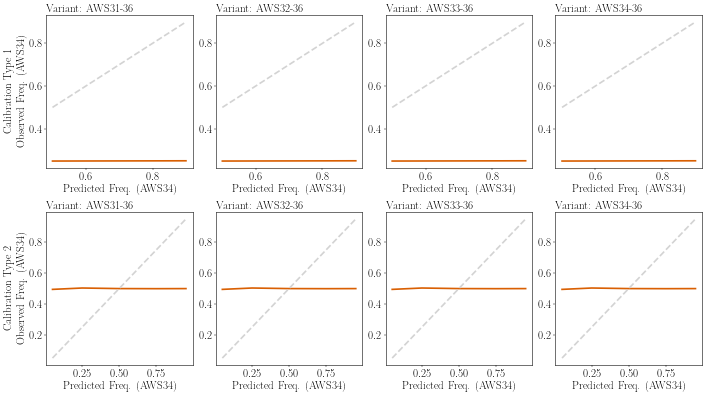

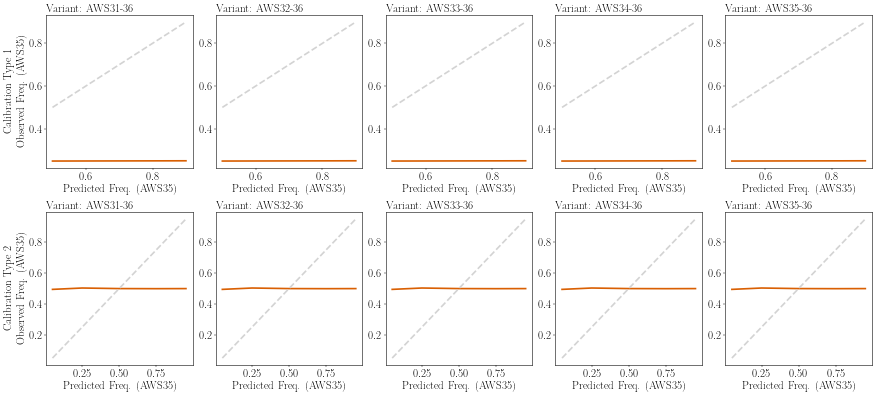

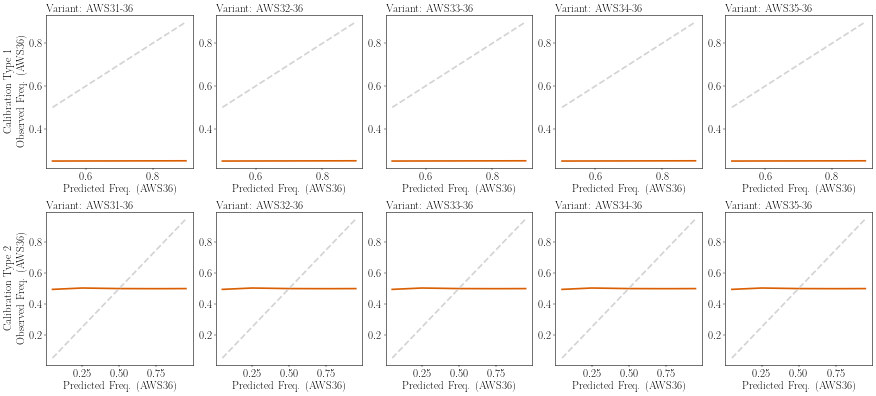

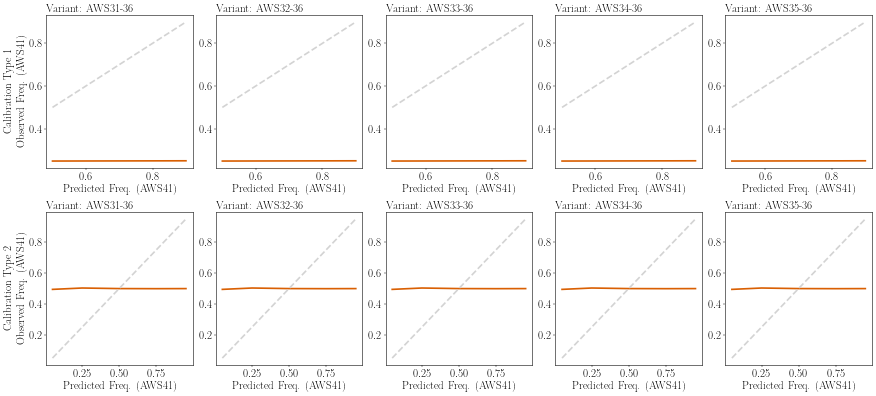

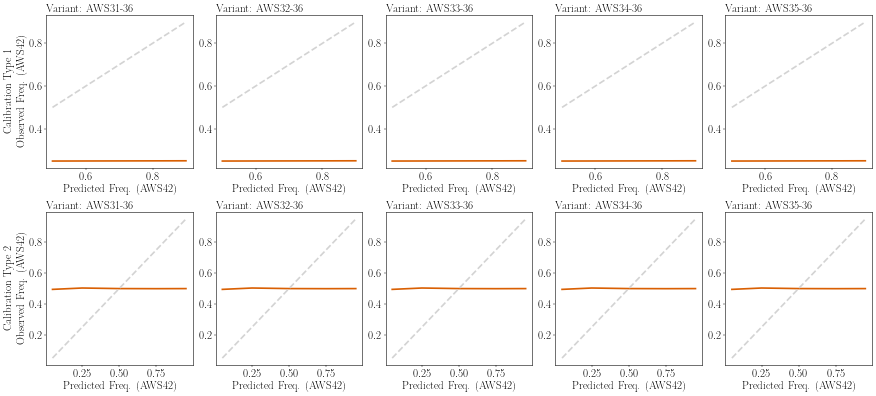

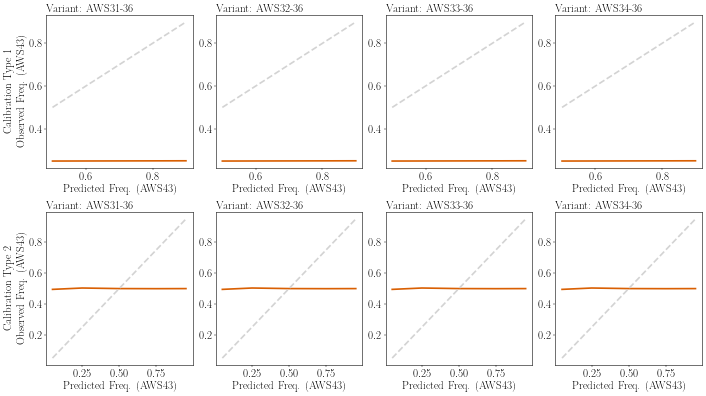

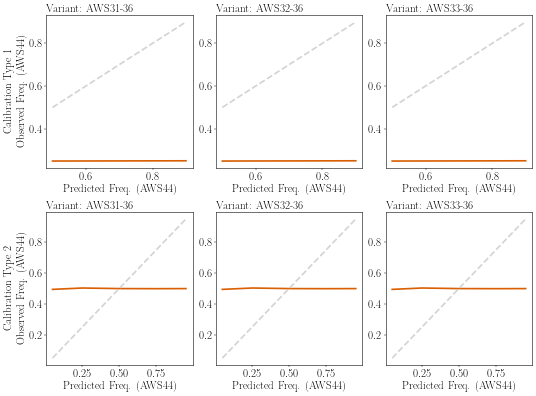

In [33]:
for channel in config.BASE_INPUT_VARIABLES[:-1]:
    channel_id = channel[-5:]

    fig, axes = plt.subplots(2, 5, figsize=(22, 10))
    
    for i, variant in enumerate(config.VARIANTS):

        variant_channels = config.VARIANTS[variant]

        if channel not in variant_channels:
    
            #  TODO: adjust to use ds from each variant
            
            #intervals, calibration_fractions_type_1 = plot_utils.calibration_type_1(ds[f"cloud_signal_{channel}_quantiles"], ds[f"cloud_signal_{channel}_true"], quantiles)
            #calibration_fractions_type_2 = plot_utils.calibration_type_2(ds[f"cloud_signal_{channel}_quantiles"], ds[f"cloud_signal_{channel}_true"], quantiles)
                
            axes[0,i].plot(intervals, calibration_fractions_type_1, ls="-", color="C1", ms=7)
        
            axes[0, i].set_title(f"Variant: {variant.upper().replace('_', '-')}", loc="left")
            axes[1, i].set_title(f"Variant: {variant.upper().replace('_', '-')}", loc="left")
            
            axes[1,i].plot(quantiles, calibration_fractions_type_2, ls="-", color="C1", ms=7)

            axes[0,i].plot(intervals, intervals, ls="--", color="lightgray")
            axes[1,i].plot(quantiles, quantiles, ls="--", color="lightgray")
            axes[0,i].set_xlabel(f"Predicted Freq. ({channel_id})")
            axes[1,i].set_xlabel(f"Predicted Freq. ({channel_id})")
        
        else:
            axes[0,i].set_visible(False)
            axes[1,i].set_visible(False)


    axes[0, 0].set_ylabel(f"Calibration Type 1\nObserved Freq. ({channel_id})")
    axes[1, 0].set_ylabel(f"Calibration Type 2\nObserved Freq. ({channel_id})")
    
    plt.tight_layout()
    
    plt.savefig(f"../figures/test_set_retrievals/model_performance/calibration_plots_{channel_id}.png", dpi=300, facecolor="white", bbox_inches="tight")


# Retrieval performance

AWS35
AWS36
AWS42
AWS43
AWS41
AWS34


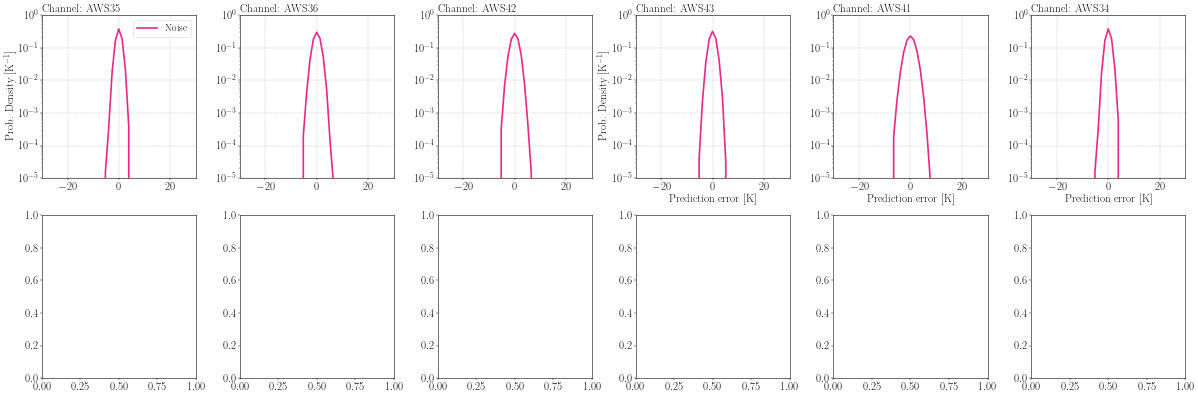

In [73]:
# TODO: always get group 4 on the bottom row
# TODO: save, fix labels etc

fig, axes_2d = plt.subplots(2, 6, figsize=(30,10))

axes = axes_2d.flatten()
for i, variant in enumerate(config.VARIANTS):

    variant_inputs = list(set(config.BASE_INPUT_VARIABLES[:-1]).difference(config.VARIANTS["aws34_36"]))
    variant_outputs = [f'CloudSignal_{var[-5:]}' for var in variant_inputs]
    n_output_variables = len(variant_outputs)

for i, var in enumerate(variant_outputs):
    
    channel = var[-5:]
    print(channel)

    """
    true = ds[f"cloud_signal_{channel}_true"]
    mean = ds[f"cloud_signal_{channel}_mean"]
    
    # plotting deviation of retrieval from true
    deviation = mean - true
    deviation_distribution, _ = np.histogram(deviation, bins=deviation_bins, density=True)
    axes[i].plot(deviation_bins_centre, deviation_distribution, color="C0", label="Retrieval-True")
    """
    
    # plotting noise for reference
    noisy_samples = np.random.normal(loc=0, scale=config.AWS_CHANNEL_NOISE[variant_inputs[i]], size=100000)
    noise_distribution, _ = np.histogram(noisy_samples, bins=deviation_bins, density=True)
    axes[i].plot(deviation_bins_centre, noise_distribution, color="C3", label="Noise")
    
    axes[i].set_yscale("log")
    axes[i].grid(which="major", ls="dashed", color="grey", alpha=0.5)
    axes[i].set_xlim(-30, 30)
    axes[i].set_yticks(np.logspace(-5,0,6))
    axes[i].set_ylim(1e-5, 1e0)
    if i == 0:
        axes[i].legend()
    
    if i > 2:
        axes[i].set_xlabel(r"Prediction error [K]")
        
    if i == 0 or i == 3:
        axes[i].set_ylabel(r"Prob. Density [K$^{-1}$]")
        
    axes[i].set_title(f"Channel: {channel[-5:]}", loc="left")
    
fig.tight_layout()

#plt.savefig(f"figures/cloud_filtering/AWS_cloudfilter_deviation_distributions.pdf", facecolor="white")

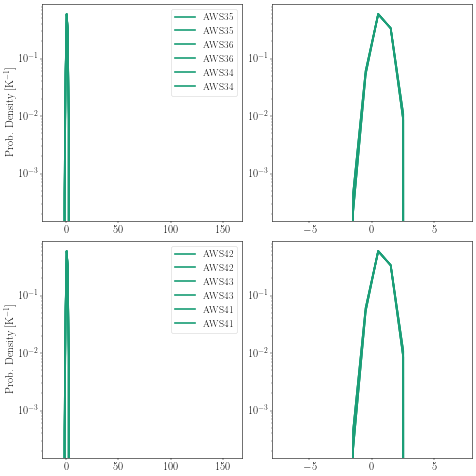

In [90]:


fig, axes_2d = plt.subplots(2, 2, figsize=(12,12))

axes = axes_2d.flatten()

for i, variant in enumerate(config.VARIANTS):

    variant_inputs = list(set(config.BASE_INPUT_VARIABLES[:-1]).difference(config.VARIANTS["aws34_36"]))
    variant_outputs = [f'CloudSignal_{var[-5:]}' for var in variant_inputs]
    n_output_variables = len(variant_outputs)

for i, var in enumerate(variant_outputs):
    
    channel = var[-5:]
    channel_id = config.CHANNEL_IDS[variant_inputs[i]]

    #true = ds[f"cloud_signal_{channel}_true"]
    #mean = ds[f"cloud_signal_{channel}_mean"]

    true = ds[f"cloud_signal_AWS33_true"]
    mean = ds[f"cloud_signal_AWS33_mean"]
    
    # plotting distribution of retrievals
    retrieval_distribution, _ = np.histogram(mean, bins=cloud_signal_bins, density=True)
    if channel_id < 40:
        axes_2d[0,0].plot(cloud_signal_bins_centre, retrieval_distribution, color="C0", label=f"{channel}")
        axes_2d[0,1].plot(cloud_signal_bins_centre, retrieval_distribution, color="C0")
    else:
        axes_2d[1,0].plot(cloud_signal_bins_centre, retrieval_distribution, color="C0", label=f"{channel}")
        axes_2d[1,1].plot(cloud_signal_bins_centre, retrieval_distribution, color="C0")

    # plotting distribution of true (test set)
    true_distribution, _ = np.histogram(true, bins=cloud_signal_bins, density=True)
    if channel_id < 40:
        axes_2d[0,0].plot(cloud_signal_bins_centre, true_distribution, color="C0", label=f"{channel}")
        axes_2d[0,1].plot(cloud_signal_bins_centre, true_distribution, color="C0")
    else:
        axes_2d[1,0].plot(cloud_signal_bins_centre, true_distribution, color="C0", label=f"{channel}")
        axes_2d[1,1].plot(cloud_signal_bins_centre, true_distribution, color="C0")

axes_2d[0,0].legend()
axes_2d[1,0].legend()
    
axes_2d[0,0].set_ylabel(r"Prob. Density [K$^{-1}$]")
axes_2d[1,0].set_ylabel(r"Prob. Density [K$^{-1}$]")

axes_2d[0,1].set_xlim([-8,8])
axes_2d[1,1].set_xlim([-8,8])
#ax2.set_xticks(np.linspace(-8, 8, 9))

for ax in axes:
    ax.set_yscale("log")

#.set_title(f"Channel: {channel[-5:]}", loc="left")
    
fig.tight_layout()

#plt.savefig(f"figures/cloud_filtering/AWS_cloudfilter_deviation_distributions.pdf", facecolor="white")